# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

In this fourth notebook we focus on the improvement and use of a Molecular Dynamics code downloaded form the Ariel website.

### Exercise 04.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N = 108$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
We improve the code adding the possibility to restart the run after a first inizialization which brings to the configurations  files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>. These configurations are the first step for the restart of the simulation.

Furthermore we add a rescalation of the velocities in order to faster reach the termalization. This is implemented since sometimes we could start from a configuration which is very distant form the  thermodynamical equilibrium we are looking for. For this reason we enable the possibility to rescale the velocities, i.e. to correct $\vec{r}(t-dt)$, in order to match the desired temperature.

The algorithm followed in order to improve the code is:

1. read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files
2. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t)$ compute $\vec{v}(t+dt/2)$; finally obtain the actual temperature $T(t+dt/2)$
3. by comparing $T(t+dt/2)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
4. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation

In order to implement the termalization we considered some simulations of 2000 or 5000 steps each. For every run we restarted from the last configurations saved in <font face="Courier">old.0</font> and <font face="Courier">old.final</font>.

Once we reach the stationary condition we save its configuration: it is useful for the simulation in the next point. (Clearly we execute this procedure for phases and not for steps, i.e. we look for the termalization for, e.g., the gas phase and, obtained the final configutation, we procede with the simulation of the Argon gas phase).
We plot the trend of the four observables: potential energy, kinetic energy, total energy (all three calculated per particle) and temperature.

In [1]:
# common libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re

### Solid phase

In [2]:
file = open("data/ex4.1_dat/input.solid", "r")
file = file.read()
s = re.findall(r"[-+]?\d*\.\d+|\d+", file)
names = ["Temperature", "Nparticles", "density", "rcut", "deltat", "nsteps", "iprint", "restart", "print"]
for i in range(len(s)):
    print(names[i] + " = " + s[i])

Temperature = 0.8
Nparticles = 108
density = 1.1
rcut = 2.2
deltat = 0.0005
nsteps = 2000
iprint = 1000
restart = 1
print = 0


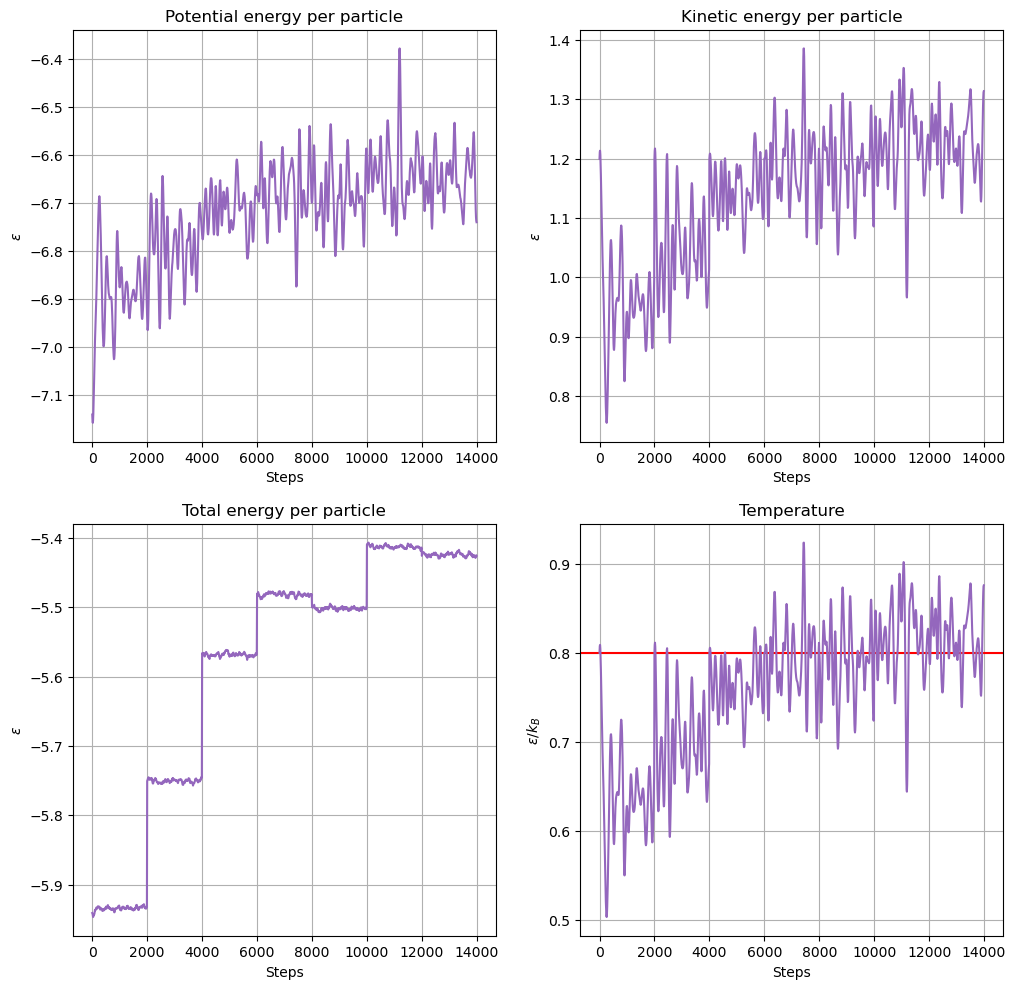

In [3]:
epot = np.loadtxt("data/ex4.1_dat/output_solid/output_epot.dat")
ekin = np.loadtxt("data/ex4.1_dat/output_solid/output_ekin.dat")
etot = np.loadtxt("data/ex4.1_dat/output_solid/output_etot.dat")
temp = np.loadtxt("data/ex4.1_dat/output_solid/output_temp.dat")
#we perform a measure every 10 steps 
steps = np.arange(len(epot)) * 10

fig, pp = plt.subplots(2, 2, figsize=(12,12),dpi=100)
pp[0,0].plot(steps, epot, color="C4")
pp[0,0].set_title("Potential energy per particle")
pp[0,0].set_ylabel("$\epsilon$")
pp[0,0].set_xlabel("Steps")
pp[0,0].grid(True)

pp[0,1].plot(steps, ekin, color="C4")
pp[0,1].set_title("Kinetic energy per particle")
pp[0,1].set_ylabel("$\epsilon$")
pp[0,1].set_xlabel("Steps")
pp[0,1].grid(True)

pp[1,0].plot(steps, etot, color="C4")
pp[1,0].set_title("Total energy per particle")
pp[1,0].set_ylabel("$\epsilon$")
pp[1,0].set_xlabel("Steps")
pp[1,0].grid(True)

pp[1,1].axhline(float(s[0]),0,1,color="red", linestyle="solid")
pp[1,1].plot(steps, temp, color="C4")
pp[1,1].set_title("Temperature")
pp[1,1].set_ylabel("$\epsilon/k_B$")
pp[1,1].set_xlabel("Steps")
pp[1,1].grid(True)
plt.show()

For the solid phase we performed a simulation made of 7 repetitions of 2000 steps. We can observe that a regime of equilibrium is reached after 10000 steps, i.e. after 5 restarts. The red line in the temperature plot represents the target temperature.

### Liquid phase

In [4]:
file = open("data/ex4.1_dat/input.liquid", "r")
file = file.read()
s = re.findall(r"[-+]?\d*\.\d+|\d+", file)
names = ["Temperature", "Nparticles", "density", "rcut", "deltat", "nsteps", "iprint", "restart", "print"]
for i in range(len(s)):
    print(names[i] + " = " + s[i])

Temperature = 1.1
Nparticles = 108
density = 0.8
rcut = 2.5
deltat = 0.0005
nsteps = 5000
iprint = 1000
restart = 1
print = 0


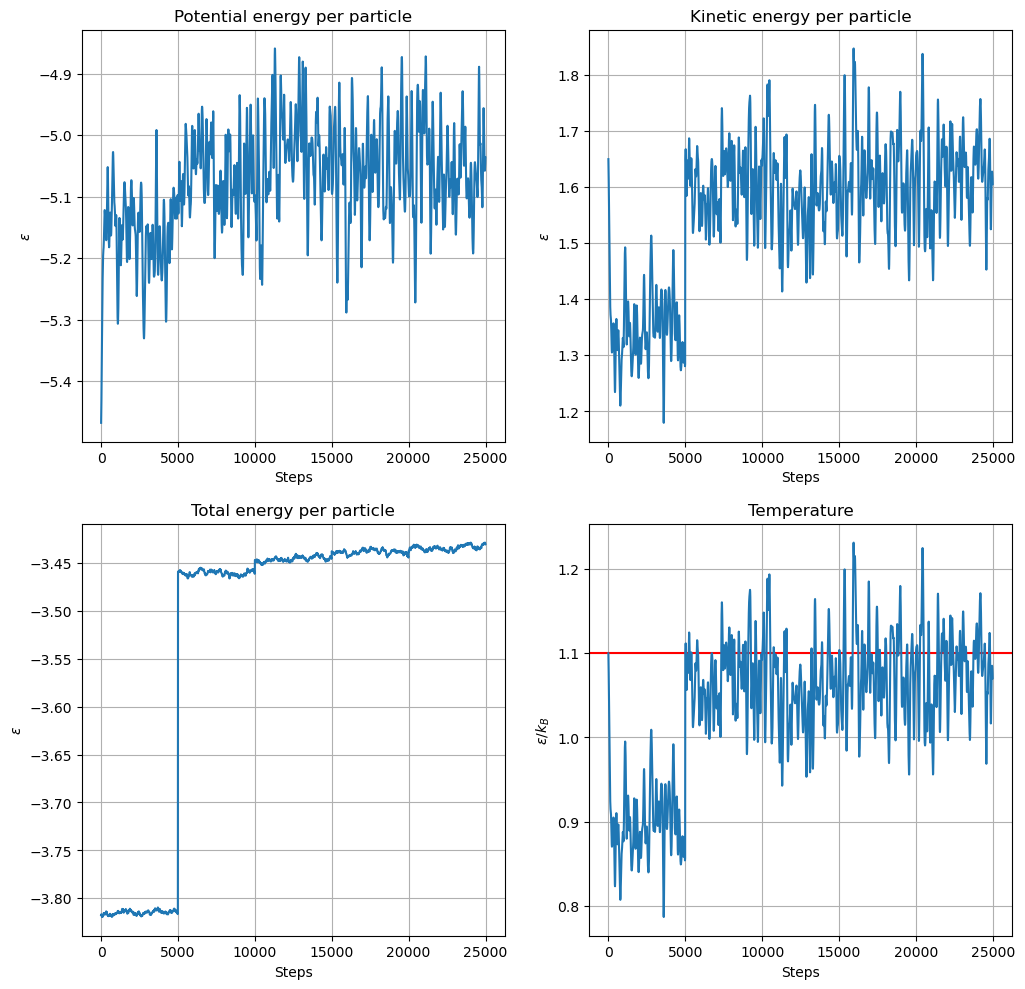

In [5]:
epot = np.loadtxt("data/ex4.1_dat/output_liquid/output_epot.dat")
ekin = np.loadtxt("data/ex4.1_dat/output_liquid/output_ekin.dat")
etot = np.loadtxt("data/ex4.1_dat/output_liquid/output_etot.dat")
temp = np.loadtxt("data/ex4.1_dat/output_liquid/output_temp.dat")
#we perform a measure every 10 steps 
steps = np.arange(len(epot)) * 10

fig, pp = plt.subplots(2, 2, figsize=(12,12),dpi=100)
pp[0,0].plot(steps, epot)
pp[0,0].set_title("Potential energy per particle")
pp[0,0].set_ylabel("$\epsilon$")
pp[0,0].set_xlabel("Steps")
pp[0,0].grid(True)

pp[0,1].plot(steps, ekin)
pp[0,1].set_title("Kinetic energy per particle")
pp[0,1].set_ylabel("$\epsilon$")
pp[0,1].set_xlabel("Steps")
pp[0,1].grid(True)

pp[1,0].plot(steps, etot)
pp[1,0].set_title("Total energy per particle")
pp[1,0].set_ylabel("$\epsilon$")
pp[1,0].set_xlabel("Steps")
pp[1,0].grid(True)

pp[1,1].axhline(float(s[0]),0,1,color="red", linestyle="solid")
pp[1,1].plot(steps, temp)
pp[1,1].set_title("Temperature")
pp[1,1].set_ylabel("$\epsilon/k_B$")
pp[1,1].set_xlabel("Steps")
pp[1,1].grid(True)
plt.show()

For the liquid phase we performed a simulation made of 5 repetitions of 5000 steps. We can observe that a regime of equilibrium is reached after 5000 steps, i.e. after the first run of the executable. The red line in the temperature plot represents the target temperature.

### Gas phase

In [6]:
file = open("data/ex4.1_dat/input.gas", "r")
file = file.read()
s = re.findall(r"[-+]?\d*\.\d+|\d+", file)
names = ["Temperature", "Nparticles", "density", "rcut", "deltat", "nsteps", "iprint", "restart", "print"]
for i in range(len(s)):
    print(names[i] + " = " + s[i])

Temperature = 1.2
Nparticles = 108
density = 0.5
rcut = 5.0
deltat = 0.0005
nsteps = 5000
iprint = 1000
restart = 1
print = 0


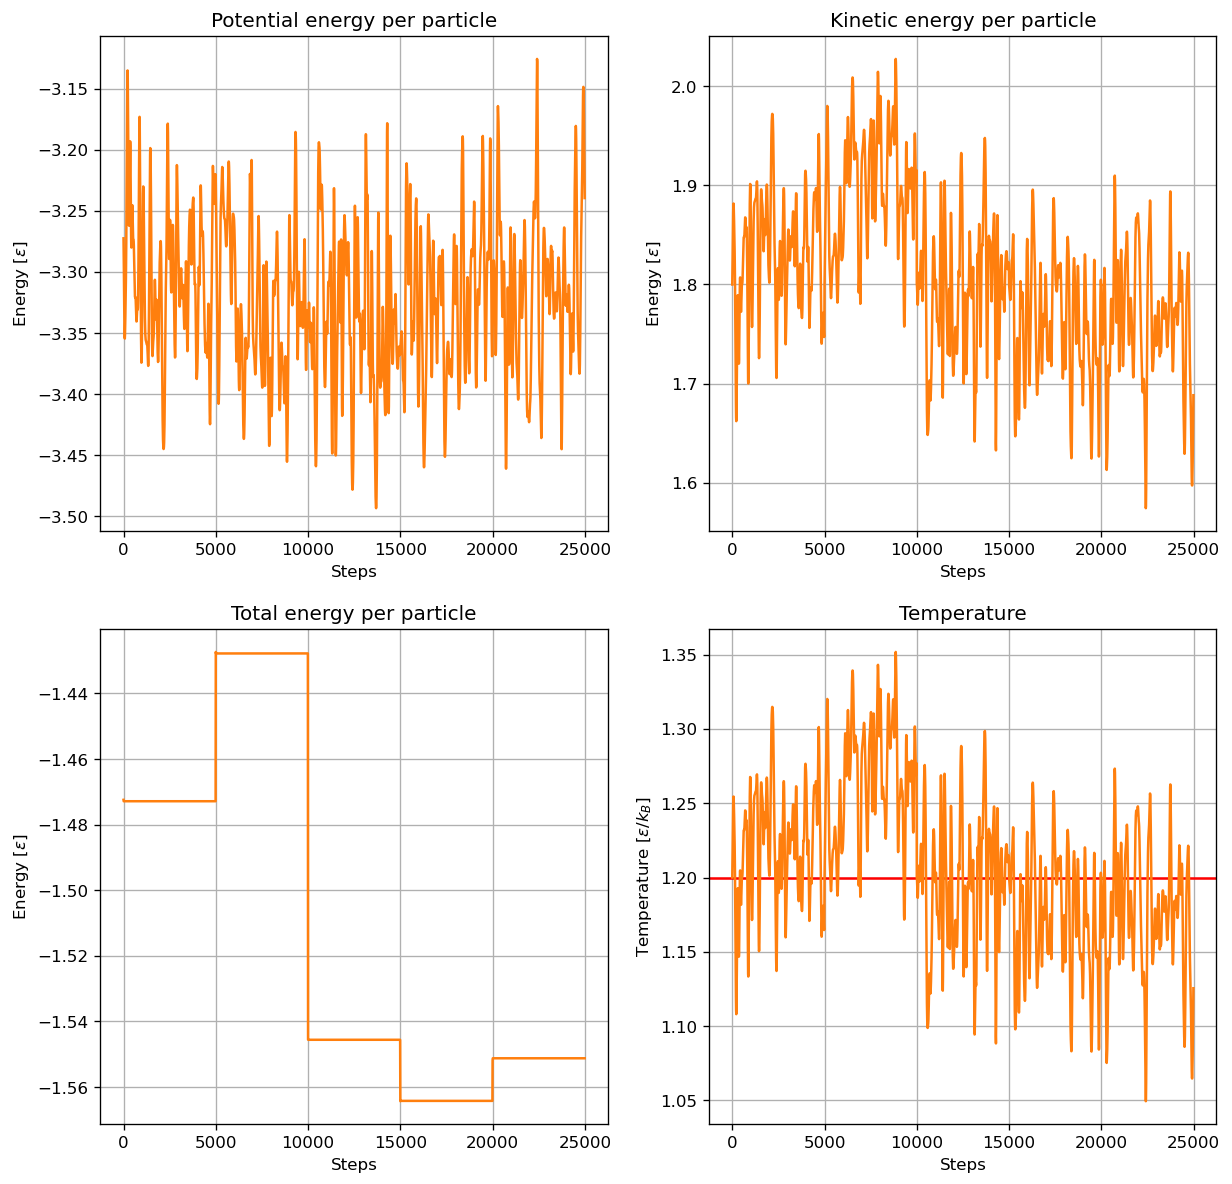

In [7]:
epot = np.loadtxt("data/ex4.1_dat/output_gas/output_epot.dat")
ekin = np.loadtxt("data/ex4.1_dat/output_gas/output_ekin.dat")
etot = np.loadtxt("data/ex4.1_dat/output_gas/output_etot.dat")
temp = np.loadtxt("data/ex4.1_dat/output_gas/output_temp.dat")
#we perform a measure every 10 steps 
steps = np.arange(len(epot)) * 10


plt.rc('text', usetex=False)
plt.rc('font', family='sans-serif')


fig, pp = plt.subplots(2, 2, figsize=(12,12),dpi=120)
pp[0,0].plot(steps, epot, color="C1")
pp[0,0].set_title("Potential energy per particle")
pp[0,0].set_ylabel("Energy $[\epsilon]$")
pp[0,0].set_xlabel("Steps")
pp[0,0].grid(True)

pp[0,1].plot(steps, ekin, color="C1")
pp[0,1].set_title("Kinetic energy per particle")
pp[0,1].set_ylabel("Energy $[\epsilon]$")
pp[0,1].set_xlabel("Steps")
pp[0,1].grid(True)

pp[1,0].plot(steps, etot, color="C1")
pp[1,0].set_title("Total energy per particle")
pp[1,0].set_ylabel("Energy $[\epsilon]$")
pp[1,0].set_xlabel("Steps")
pp[1,0].grid(True)

pp[1,1].axhline(float(s[0]),0,1,color="red", linestyle="solid")
pp[1,1].plot(steps, temp, color="C1")
pp[1,1].set_title("Temperature")
pp[1,1].set_ylabel("Temperature $[\epsilon/k_B]$")
pp[1,1].set_xlabel("Steps")
pp[1,1].grid(True)
plt.show()

For the gas phase we performed a simulation made of 5 repetitions of 5000 steps. We can observe that a regime of equilibrium is reached after 10000 steps, i.e. after 2 runs of the executable. The red line in the temperature plot represents the target temperature.

### Exercise 04.2

In the second exercise we further optimize the code in order to enable the possibility to perform the blocking method.
We write a method of the class MolDyn which calculate the average and the standard deviation runtime. The role of such method is the same role of the python scripts in the past notebook: divide a set of data in a finite number of blocks, promote the latter as the data of the observable and use them to calculate the mean value and its variance.
We directly use this method in the next exercise.

### Exercise 04.3

In the third exercise we equilibrate and perform MD simulations via Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the same conditions analysed above:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

We show average values and uncertainties for the total (internal) energy per particle, the potential energy per particle, the kinetic energy per particle, and the temperature in SI units.

As before we show in order solid, liquid and gaseous phase.
We underline that we increment the number of steps of the algorithm to $100000$. In particular, we perform a measure every 10 steps and divide such $10000$ measures in $100$ blocks made of $100$ steps each. scrivere come e quante misure, ogni quanti passi e in quanti blocchi.
Finally, as far as the equilibrium of the system is concerned,we start our simulation from the configuration obtained at the end of the exercise 4.1.

### Solid phase

In [8]:
#import the constants. We need the Boltzmann constant
import scipy.constants as const
kb = const.Boltzmann

file = open("data/ex4.2_dat/input.solid", "r")
file = file.read()
s = re.findall(r"[-+]?\d*\.\d+|\d+", file)
names = ["Temperature", "Nparticles", "density", "rcut", "deltat", "nsteps", "iprint", "restart", "print"]
for i in range(len(s)):
    print(names[i] + " = " + s[i])

Temperature = 0.8
Nparticles = 108
density = 1.1
rcut = 2.2
deltat = 0.0005
nsteps = 100000
iprint = 1000
restart = 1
print = 0


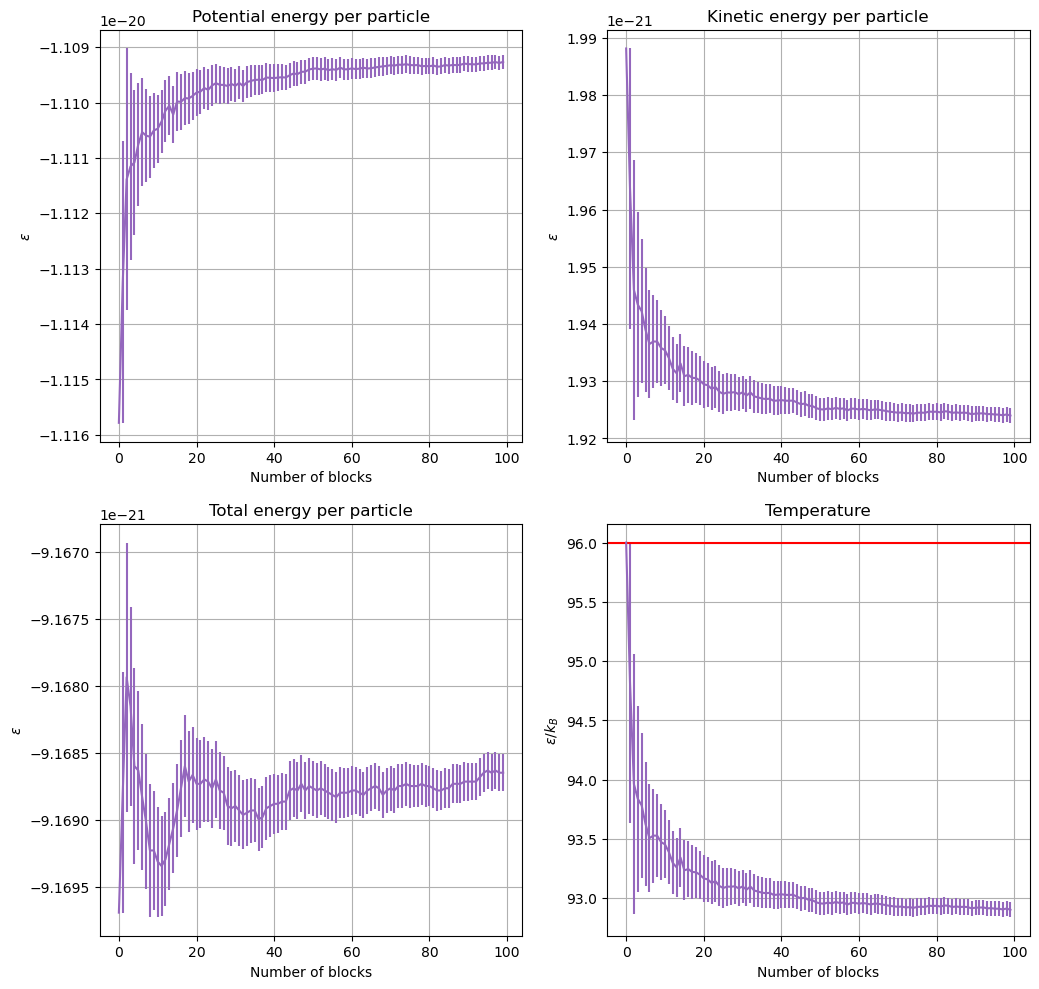

In [9]:
epot = np.loadtxt("data/ex4.2_dat/output_solid/output_ave_epot.dat")
ekin = np.loadtxt("data/ex4.2_dat/output_solid/output_ave_ekin.dat")
etot = np.loadtxt("data/ex4.2_dat/output_solid/output_ave_etot.dat")
temp = np.loadtxt("data/ex4.2_dat/output_solid/output_ave_temp.dat")

x = np.arange(len(epot))
y_epot = epot[:,1] 
y_ekin = ekin[:,1] 
y_etot = etot[:,1] 
y_temp = temp[:,1] 


fig, pp = plt.subplots(2, 2, figsize=(12,12),dpi=100)
pp[0,0].errorbar(x, y_epot*120*kb, yerr = epot[:,2]*120*kb, color="C4")#transform the result in SI units 
pp[0,0].set_title("Potential energy per particle")
pp[0,0].set_ylabel("$\epsilon$")
pp[0,0].set_xlabel("Number of blocks")
pp[0,0].grid(True)

pp[0,1].errorbar(x, y_ekin*120*kb, yerr = ekin[:,2]*120*kb, color="C4")
pp[0,1].set_title("Kinetic energy per particle")
pp[0,1].set_ylabel("$\epsilon$")
pp[0,1].set_xlabel("Number of blocks")
pp[0,1].grid(True)

pp[1,0].errorbar(x, y_etot*120*kb, yerr = etot[:,2]*120*kb, color="C4")
pp[1,0].set_title("Total energy per particle")
pp[1,0].set_ylabel("$\epsilon$")
pp[1,0].set_xlabel("Number of blocks")
pp[1,0].grid(True)

pp[1,1].axhline(float(s[0])*120,0,1,color="red", linestyle="solid")
pp[1,1].errorbar(x, y_temp*120, yerr = temp[:,2]*120, color="C4")
pp[1,1].set_title("Temperature")
pp[1,1].set_ylabel("$\epsilon/k_B$")
pp[1,1].set_xlabel("Number of blocks")
pp[1,1].grid(True)
plt.show()


### Liquid phase

In [10]:
file = open("data/ex4.2_dat/input.liquid", "r")
file = file.read()
s = re.findall(r"[-+]?\d*\.\d+|\d+", file)
names = ["Temperature", "Nparticles", "density", "rcut", "deltat", "nsteps", "iprint", "restart", "print"]
for i in range(len(s)):
    print(names[i] + " = " + s[i])

Temperature = 1.1
Nparticles = 108
density = 0.8
rcut = 2.5
deltat = 0.0005
nsteps = 100000
iprint = 1000
restart = 1
print = 0


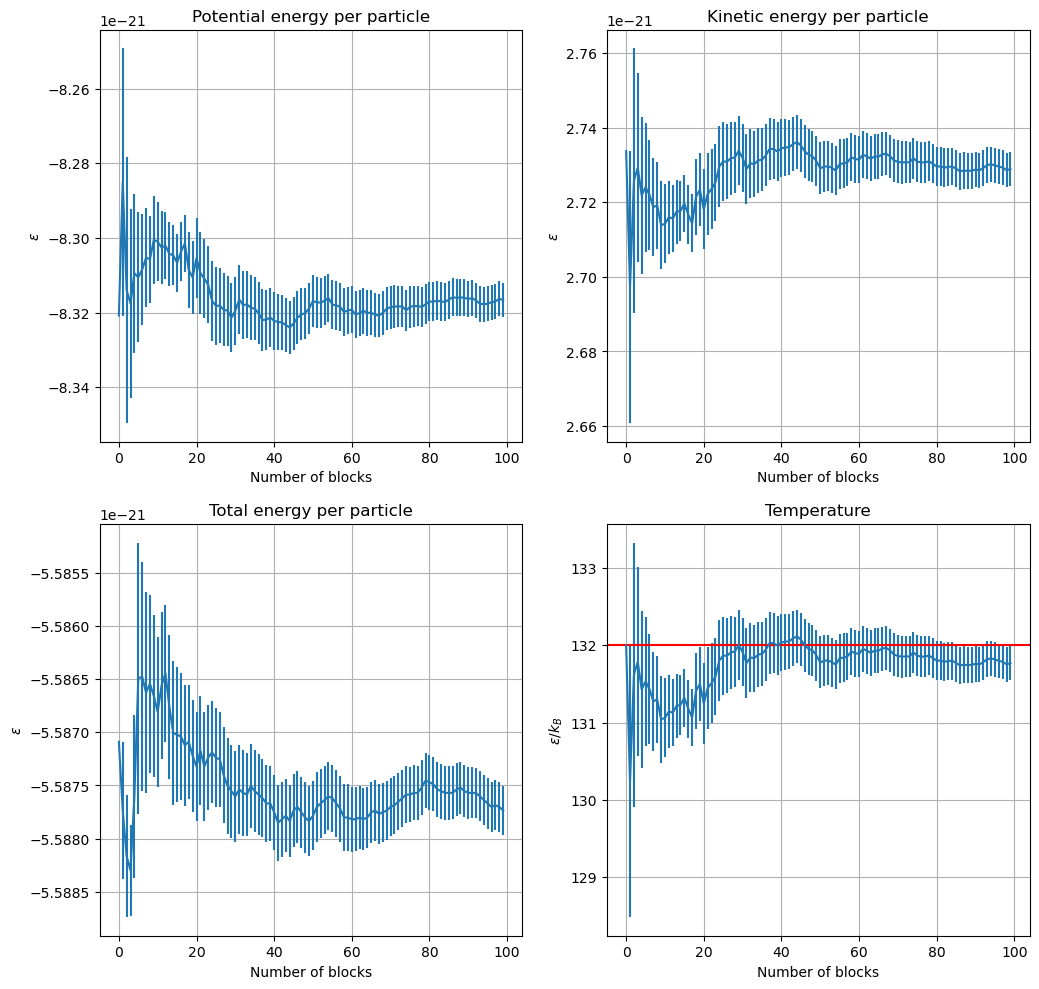

In [11]:
epot = np.loadtxt("data/ex4.2_dat/output_liquid/output_ave_epot.dat")
ekin = np.loadtxt("data/ex4.2_dat/output_liquid/output_ave_ekin.dat")
etot = np.loadtxt("data/ex4.2_dat/output_liquid/output_ave_etot.dat")
temp = np.loadtxt("data/ex4.2_dat/output_liquid/output_ave_temp.dat")

x = np.arange(len(epot))
y_epot = epot[:,1] 
y_ekin = ekin[:,1] 
y_etot = etot[:,1] 
y_temp = temp[:,1] 


fig, pp = plt.subplots(2, 2, figsize=(12,12),dpi=100)
pp[0,0].errorbar(x, y_epot*120*kb, yerr = epot[:,2]*120*kb)
pp[0,0].set_title("Potential energy per particle")
pp[0,0].set_ylabel("$\epsilon$")
pp[0,0].set_xlabel("Number of blocks")
pp[0,0].grid(True)

pp[0,1].errorbar(x, y_ekin*120*kb, yerr = ekin[:,2]*120*kb)
pp[0,1].set_title("Kinetic energy per particle")
pp[0,1].set_ylabel("$\epsilon$")
pp[0,1].set_xlabel("Number of blocks")
pp[0,1].grid(True)

pp[1,0].errorbar(x, y_etot*120*kb, yerr = etot[:,2]*120*kb)
pp[1,0].set_title("Total energy per particle")
pp[1,0].set_ylabel("$\epsilon$")
pp[1,0].set_xlabel("Number of blocks")
pp[1,0].grid(True)

pp[1,1].axhline(float(s[0])*120,0,1,color="red", linestyle="solid")
pp[1,1].errorbar(x, y_temp*120, yerr = temp[:,2]*120)
pp[1,1].set_title("Temperature")
pp[1,1].set_ylabel("$\epsilon/k_B$")
pp[1,1].set_xlabel("Number of blocks")
pp[1,1].grid(True)
plt.show()

### Gas phase

In [12]:
file = open("data/ex4.2_dat/input.gas", "r")
file = file.read()
s = re.findall(r"[-+]?\d*\.\d+|\d+", file)
names = ["Temperature", "Nparticles", "density", "rcut", "deltat", "nsteps", "iprint", "restart", "print"]
for i in range(len(s)):
    print(names[i] + " = " + s[i])

Temperature = 1.2
Nparticles = 108
density = 0.5
rcut = 5.0
deltat = 0.0005
nsteps = 100000
iprint = 1000
restart = 1
print = 0


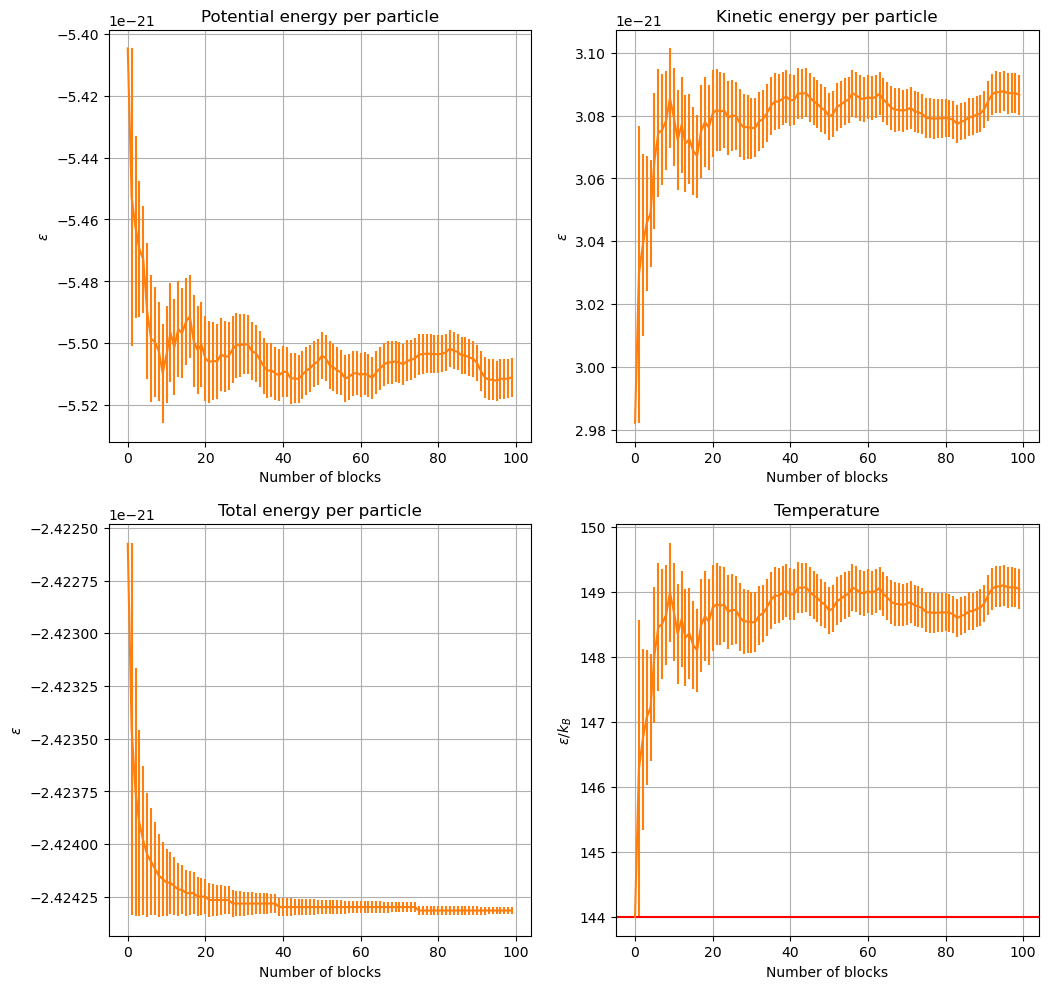

In [13]:
epot = np.loadtxt("data/ex4.2_dat/output_gas/output_ave_epot.dat")
ekin = np.loadtxt("data/ex4.2_dat/output_gas/output_ave_ekin.dat")
etot = np.loadtxt("data/ex4.2_dat/output_gas/output_ave_etot.dat")
temp = np.loadtxt("data/ex4.2_dat/output_gas/output_ave_temp.dat")

x = np.arange(len(epot))
y_epot = epot[:,1] 
y_ekin = ekin[:,1] 
y_etot = etot[:,1] 
y_temp = temp[:,1] 

fig, pp = plt.subplots(2, 2, figsize=(12,12),dpi=100)
pp[0,0].errorbar(x, y_epot*120*kb, yerr = epot[:,2]*120*kb, color="C1")
pp[0,0].set_title("Potential energy per particle")
pp[0,0].set_ylabel("$\epsilon$")
pp[0,0].set_xlabel("Number of blocks")
pp[0,0].grid(True)

pp[0,1].errorbar(x, y_ekin*120*kb, yerr = ekin[:,2]*120*kb, color="C1")
pp[0,1].set_title("Kinetic energy per particle")
pp[0,1].set_ylabel("$\epsilon$")
pp[0,1].set_xlabel("Number of blocks")
pp[0,1].grid(True)

pp[1,0].errorbar(x, y_etot*120*kb, yerr = etot[:,2]*120*kb, color="C1")
pp[1,0].set_title("Total energy per particle")
pp[1,0].set_ylabel("$\epsilon$")
pp[1,0].set_xlabel("Number of blocks")
pp[1,0].grid(True)

pp[1,1].axhline(float(s[0])*120,0,1,color="red", linestyle="solid")
pp[1,1].errorbar(x, y_temp*120, yerr = temp[:,2]*120, color="C1")
pp[1,1].set_title("Temperature")
pp[1,1].set_ylabel("$\epsilon/k_B$")
pp[1,1].set_xlabel("Number of blocks")
pp[1,1].grid(True)
plt.show()

In all the plots of the temperature, we draw a red line representing the target temperature. Even if, at a first sight, we were brought to think that there was something wrong with the code (that's why we decided to equilibrate the liquid and the solid phase with cycles of 5000 steps insted of 2000), it is important to note that we don't have to compare the temperature reached by the system via simulation with such target. In our case the temperature reached and the target temperature arrive to differ $5 K$ in the gas phase, but it is not a problem. Indeed in the microcanonical ensamble the temperature isn't fixed and can change. 

Finally we show an OVITO image of our system, representing the elemental cubic cell in the liquid phase. We add the color coding on the X position and see the evolution of the system.

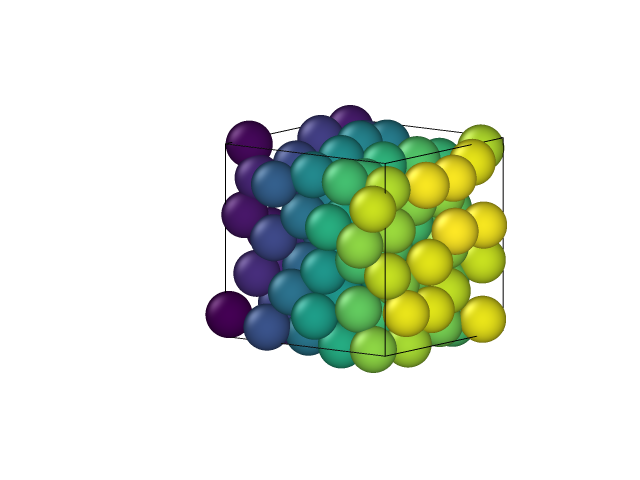

# Cose da buttare 

### Osservazioni nella parte di solido

We can observe that the total energy presents very low fluctuations if compared with the fluctuations of the other quantities. This is due to the fact that the Verlet algorithm, used to calculated the molecular dynamics, conserves the energy (locally). We expect such a behaviour since in the canonical ensable are fixed the number of particles $N$, the volume $V$ and the energy $E$.

 We can observe that the total energy presents very low fluctuations if compared with the fluctuations of the other quantities. This is due to the fact that the Verlet algorithm, used to calculated the molecular dynamics, conserves the energy (locally). We expect such a behaviour since in the canonical ensable are fixed the number of particles $N$, the volume $V$ and the energy $E$. Finally we can also observe that the main contribution to the total energy is again given by the potential energy.

 We can observe that the total energy presents very low fluctuations if compared with the fluctuations of the other quantities. This is due to the fact that the Verlet algorithm, used to calculated the molecular dynamics, conserves the energy (locally). We expect such a behaviour since in the canonical ensable are fixed the number of particles $N$, the volume $V$ and the energy $E$. we can also observe that, as the previous cases, the main contribution to the total energy is given by the potential energy, but we can also see that the predominance of the potential energy is not so accentuated as before. In particular, the potential energy has a trend quite constant over the total number of step; this means that the equilibrium is reached due to the settlement of kinetic energy.

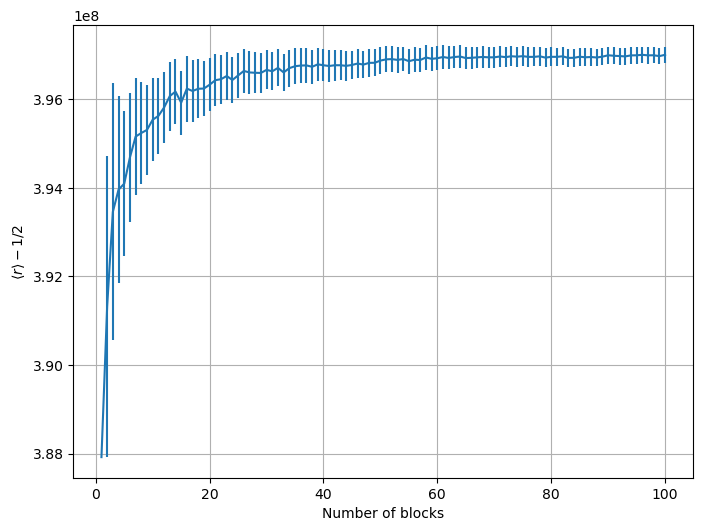

In [15]:
x, pres_solid, err_pres_solid = np.loadtxt("data/ex4.2_dat/output_solid/output_ave_pres.dat", usecols=(0,1,2), dtype="int,float,float", unpack=True)

figure(figsize=(8, 6), dpi=100)
#plt.hlines(0,0,100, color = "black")
plt.errorbar(x,pres_solid*120*kb/(0.34e-09)**3,yerr=err_pres_solid*120*kb/(0.34e-09)**3)
plt.xlabel("Number of blocks")
plt.ylabel(r"$Pressure$")
plt.grid(True)
plt.show()